<a href="https://colab.research.google.com/github/katie-060330/AI-assignment-1/blob/gh-pages/AIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: <br/>
Student Number:

Name: <br/>
Student Number:

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [123]:
#the target variable is if they have diabetes
#the numarical values are age. hypertension, heart_deaease, bmi, hbA1c_level, blood glucose, and finally diabetes
#the non numarical features are  smoking_history, and gender, we can one hot encode both to be turned into arrays with 0s and 1s
dataset =  pd.read_csv('https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv')
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

In [124]:
cols = ['gender',	'age',	'hypertension',	'heart_disease',	"smoking_history",	'bmi',	'HbA1c_level',	'blood_glucose_level',	'diabetes']
for c in cols:
  print(f"{c}: {dataset[c].dtype}")

gender: object
age: float64
hypertension: int64
heart_disease: int64
smoking_history: object
bmi: float64
HbA1c_level: float64
blood_glucose_level: int64
diabetes: int64


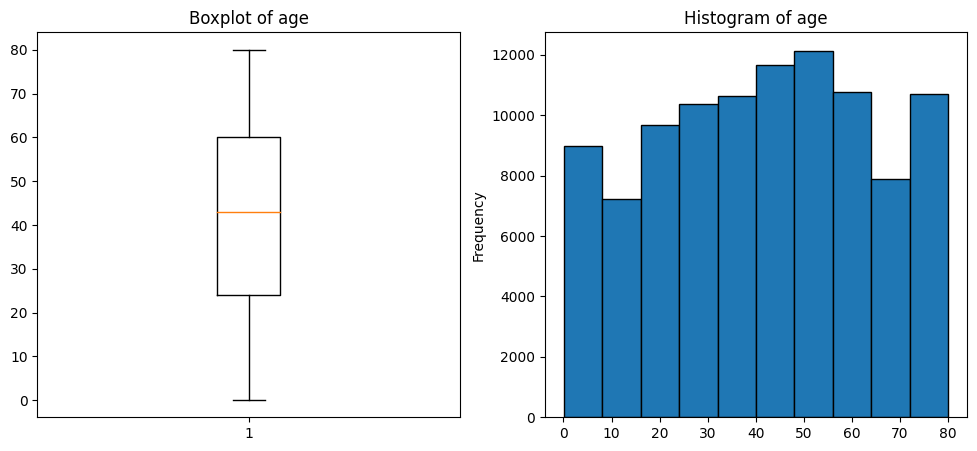

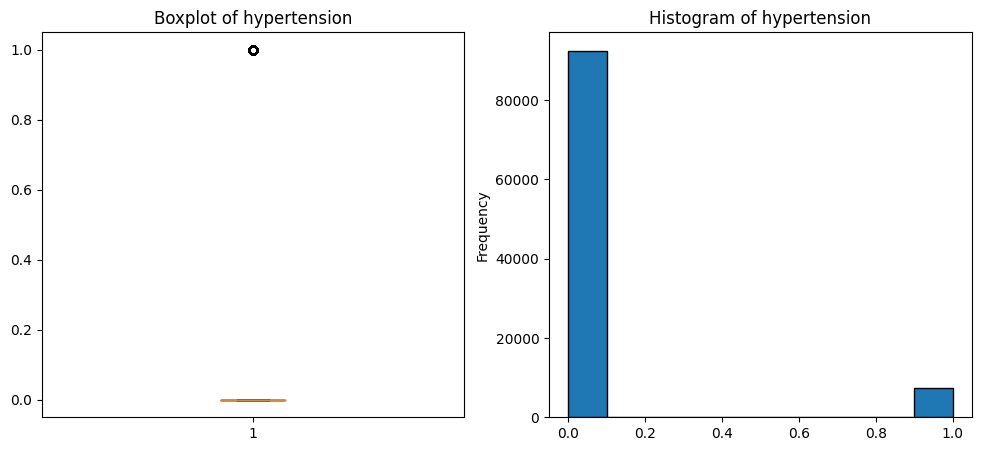

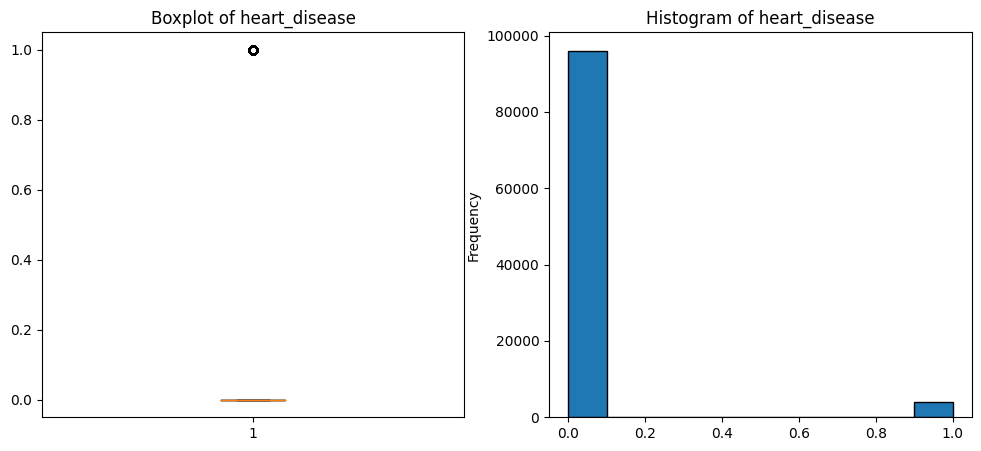

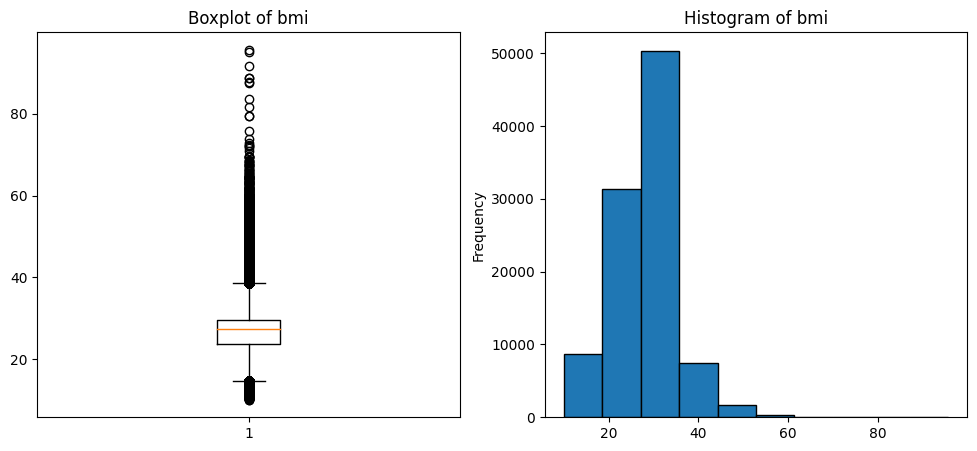

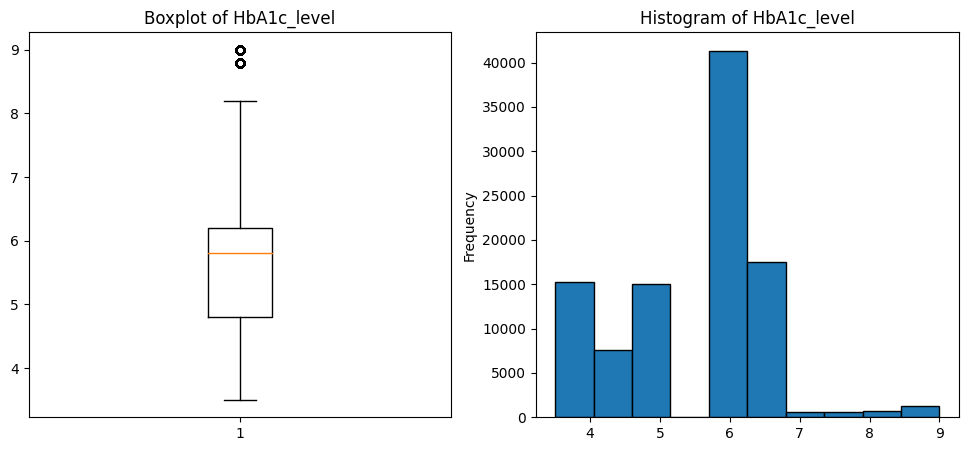

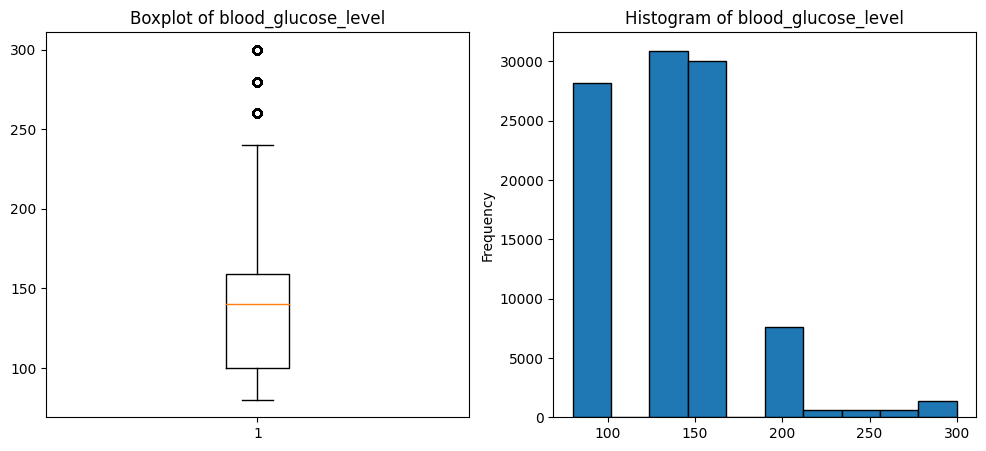

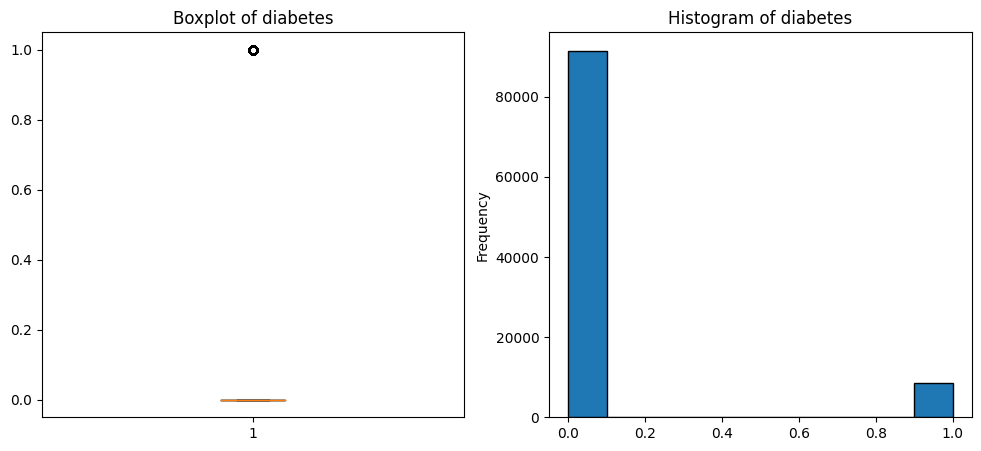

In [125]:
cols = [	'age',	'hypertension',	'heart_disease',	'bmi',	'HbA1c_level',	'blood_glucose_level',	'diabetes']

for c in cols:

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].boxplot(dataset[c])
    axes[0].set_title(f'Boxplot of {c}')
    dataset[c].plot(kind='hist', bins=10, edgecolor='black', ax=axes[1])
    axes[1].set_title(f'Histogram of {c}')

    plt.show()

#https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots

#Feature Distribution Analysis
 - there are numerous binary values
   - gender wheer theer are more _ than _
   - hyperstenion and heart disease more People do not have it rather than have it
   - diabetes where more poeple do not have it rather than have it
- age
  - a very diverse amount of ages with not many outliers
-smoking history
 - have a majoriyt of no inof could be a variable to be taken out
- bmi
 - a ton of outliers with an average or around 30
- hbA1c
  - similar to bmi we have a spike at about 5.5
- glucose level
  - has aoutliers to the top, could be transformed

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

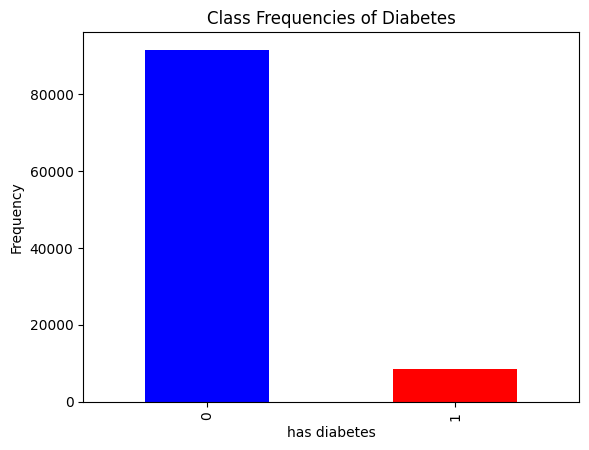

In [126]:
data = dataset['diabetes'].value_counts()

data.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Frequencies of Diabetes')
plt.ylabel('Frequency')
plt.xlabel('has diabetes')

plt.show()

#obviouslt here we have an overwhmeing ammount of data for people who do not have diabetes

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [127]:
y = dataset['diabetes']  # Extracts the target variable
X = dataset.drop(columns=['diabetes'])  # Drops the target variable from the dataset to create features

# Splits the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.isnull().values.any())

False


## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

In [128]:
X_train['gender'] = X_train['gender'].astype(str)
X_test['gender'] = X_test['gender'].astype(str)

encoder_gender = OrdinalEncoder()

X_train['gender'] = encoder_gender.fit_transform(X_train[['gender']])
X_test['gender'] = encoder_gender.transform(X_test[['gender']])
print(X_train.isnull().values.any())

False


In [129]:
X_train['smoking_history'] = X_train['smoking_history'].astype(str)
X_test['smoking_history'] = X_test['smoking_history'].astype(str)
label_encoder_smoking = LabelEncoder()
X_train['smoking_history'] = label_encoder_smoking.fit_transform(X_train['smoking_history'])
X_test['smoking_history'] = label_encoder_smoking.transform(X_test['smoking_history'])


#https://www.geeksforgeeks.org/python-pandas-to_numeric-method/

#using label encoding becaseu one hot will take up too much space while this will introduce
#very little bias


6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [130]:
#https://www.geeksforgeeks.org/normalization-vs-standardization/
#stadardization would be good for hba1_c becasue it is closer to normal distribution
#so we will use stadardization
#normalization would be good for bmi becasue standardisation coulsd be affected by outliers
#and bmi has alot of outliers according to the box plot

In [131]:
X_train['HbA1c_level'] = stats.zscore(X_train['HbA1c_level'])
X_train['bmi'] = X_train['bmi'] /X_train['bmi'].abs().max()

X_test['HbA1c_level'] = stats.zscore(X_test['HbA1c_level'])
X_test['bmi'] = X_test['bmi'] /X_test['bmi'].abs().max()
#https://www.geeksforgeeks.org/normalize-a-column-in-pandas/
#https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/


## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [134]:
clif = tree.DecisionTreeClassifier()

clif.fit(X_train, y_train)

y_pred = clif.predict(X_test)



8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [135]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

#refence slides on september 11/16

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [ ]:
# Code cell

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

In [ ]:
# Code cell

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes?
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources